In [1]:
# UCSD ECE 143 Programming for Data Analysis
# Winter 2023
# Author: m3cheung@ucsd.edu
# Final Project: create mmr by race bar graph for years 2018-2021

Import modules

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Load csv files into Pandas DataFrames

In [3]:
abnormal_conditions_df = pd.read_csv(\
    "../data_csv/abnormal_conditions_by_prenatal_total.csv").drop(columns=["Notes", "Number of Prenatal Visits Code", "Year Code", "Abnormal Conditions Checked Code"])


print(abnormal_conditions_df["Year"].dtype)

display(abnormal_conditions_df)

float64


,Number of Prenatal Visits,Year,Abnormal Conditions Checked,Births
0,0 prenatal visits,2018.0,At least one checked,14478.0
1,0 prenatal visits,2018.0,None checked,48980.0
2,0 prenatal visits,2019.0,At least one checked,15079.0
3,0 prenatal visits,2019.0,None checked,52584.0
4,0 prenatal visits,2020.0,At least one checked,15151.0
...,...,...,...,...
455,NaN,NaN,NaN,NaN
456,NaN,NaN,NaN,NaN
457,NaN,NaN,NaN,NaN
458,NaN,NaN,NaN,NaN


Clean up data

In [4]:
# remove NaN rows
abnormal_conditions_df = abnormal_conditions_df.dropna()

temp_df = abnormal_conditions_df[abnormal_conditions_df["Abnormal Conditions Checked"] != "At least one checked"]
abnormal_conditions_df = abnormal_conditions_df[abnormal_conditions_df["Abnormal Conditions Checked"] == "At least one checked"]

print(abnormal_conditions_df["Year"].dtype)

abnormal_conditions_df = abnormal_conditions_df.merge(
    temp_df, on=["Year", "Number of Prenatal Visits"], how="left").reset_index(drop=True)
abnormal_conditions_df["Total Births"] = abnormal_conditions_df["Births_x"] + abnormal_conditions_df["Births_y"]
abnormal_conditions_df["Percentage of Births w/ Abnormal Conditions"] = abnormal_conditions_df["Births_x"]/abnormal_conditions_df["Total Births"] *100

abnormal_conditions_df=abnormal_conditions_df.dropna()
abnormal_conditions_df = abnormal_conditions_df[abnormal_conditions_df["Number of Prenatal Visits"] != "Unknown or Not Stated"]
abnormal_conditions_df['Number of Prenatal Visits'] = abnormal_conditions_df['Number of Prenatal Visits'].str.replace(
    "prenatal visits", '')
abnormal_conditions_df =abnormal_conditions_df.reset_index(drop=True)

abnormal_conditions_df = abnormal_conditions_df.dropna()

display(abnormal_conditions_df)

# ratio_df = pd.concat([abnormal_conditions_df, abnormal_conditions_df.groupby(["Number of Prenatal Visits", "Year"])["Births"]])

# # rename Births col
# abnormal_conditions_df = abnormal_conditions_df.rename({\
#     "Births":"Births w/ Abnormal Condition(s)"})

# #define how to aggregate various fields
# agg_functions = {'employee': 'first', 'sales': 'sum', 'returns': 'sum'}

# #create new DataFrame by combining rows with same id values
# df_new = df.groupby(df['id']).aggregate(agg_functions)

# display(ratio_df)

float64


,Number of Prenatal Visits,Year,Abnormal Conditions Checked_x,Births_x,Abnormal Conditions Checked_y,Births_y,Total Births,Percentage of Births w/ Abnormal Conditions
0,0,2018.0,At least one checked,14478.0,None checked,48980.0,63458.0,22.815090
1,0,2019.0,At least one checked,15079.0,None checked,52584.0,67663.0,22.285444
2,0,2020.0,At least one checked,15151.0,None checked,52499.0,67650.0,22.396157
3,0,2021.0,At least one checked,17171.0,None checked,56989.0,74160.0,23.153991
4,1,2018.0,At least one checked,3747.0,None checked,12946.0,16693.0,22.446534
...,...,...,...,...,...,...,...,...
199,50,2019.0,At least one checked,48.0,None checked,114.0,162.0,29.629630
200,50,2020.0,At least one checked,30.0,None checked,79.0,109.0,27.522936
201,50,2021.0,At least one checked,27.0,None checked,75.0,102.0,26.470588
202,60,2018.0,At least one checked,15.0,None checked,19.0,34.0,44.117647


Calculate MMR for each row

In [5]:
print(abnormal_conditions_df["Year"].dtype)

float64


Create Bar graph

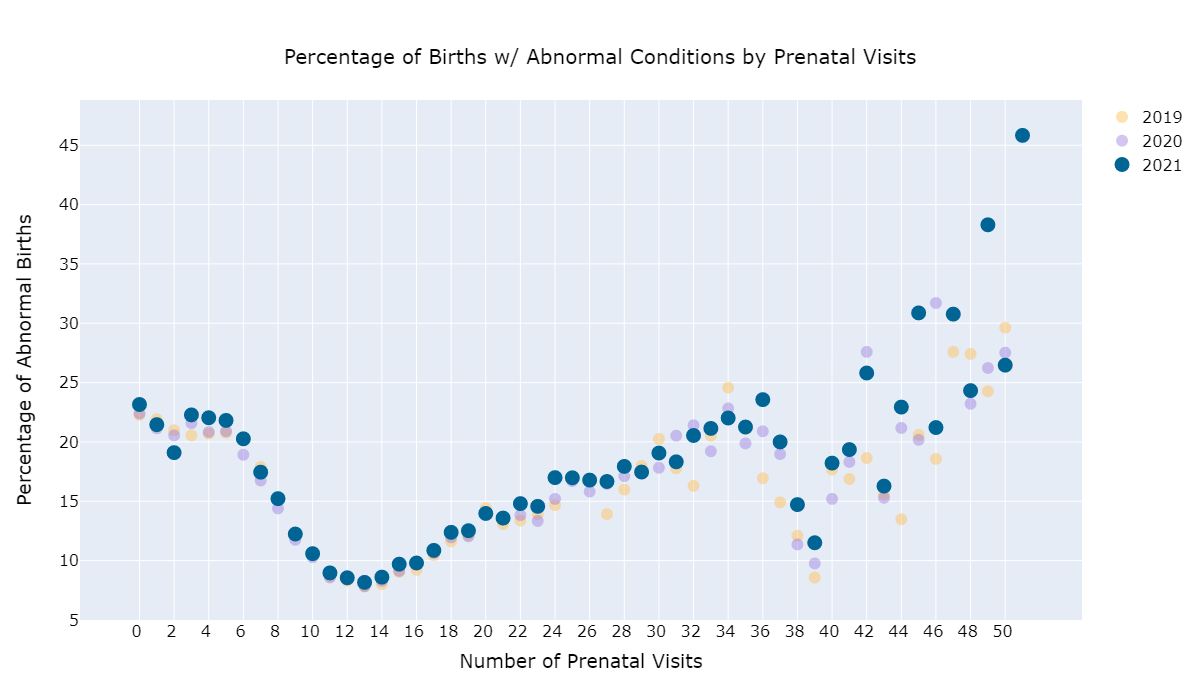

In [73]:
# use plotly's historgram function
# first argument is the datafram, then put your x and y axis
# colors the column name referencing the different bars in each group, if you want to group the bars by the x-axis, use group bar mode
# category_orders helps order the bars, I wanted ascending order
# 

# fig = px.scatter(abnormal_conditions_df, x=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2019.0]["Number of Prenatal Visits"], y=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2019.0]["Percentage of Births w/ Abnormal Conditions"])
# fig.add_scatter(abnormal_conditions_df, x=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2020.0]["Number of Prenatal Visits"],
#                 y=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2020.0]["Percentage of Births w/ Abnormal Conditions"])
# fig.show()

scatter2019 = go.Scatter(x=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2019.0]["Number of Prenatal Visits"], y=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2019.0]["Percentage of Births w/ Abnormal Conditions"], 
                         mode="markers", opacity=0.5,  marker_size=12, marker_color="rgb(253, 195, 96)",
                         name = "2019")
scatter2020 = go.Scatter(x=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2020.0]["Number of Prenatal Visits"], y=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2020.0]["Percentage of Births w/ Abnormal Conditions"],
                         mode="markers", opacity=0.4, marker_size=12, marker_color="rgb(147,112,219)",
                         name = "2020")
scatter2021 = go.Scatter(x=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2021.0]["Number of Prenatal Visits"], y=abnormal_conditions_df[abnormal_conditions_df["Year"] == 2021.0]["Percentage of Births w/ Abnormal Conditions"],
                         mode="markers", marker_size=15, marker_color="rgb(0, 100, 148)",
                         name = "2021")


scatterTotal = [scatter2019, scatter2020, scatter2021]
fig = go.Figure(scatterTotal)
fig.update_layout(
    autosize=False,
    width=1200,
    height=700,
    title={
        'text': "Percentage of Births w/ Abnormal Conditions by Prenatal Visits (2019-2021)",
        'xanchor': 'center',
        'yanchor': 'top',
        'x': 0.5},
    yaxis_title={'text': 'Percentage of Abnormal Births'},
    xaxis_title={'text': 'Number of Prenatal Visits'})

fig.update_layout(
    font_family="Verdana",
    font_color="black",
    font_size=16,
    title_font_family="Verdana",
    title_font_color="black",
    title_font_size=20,
    legend_title_font_color="black"
)
fig.show(renderer="png")
